In [ ]:
!pip install visualkeras

In [ ]:
from google.colab import files
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
import visualkeras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,GlobalAveragePooling2D,BatchNormalization,MaxPooling2D
from keras.losses import binary_crossentropy,categorical_crossentropy
from keras.models import Model,Sequential
from keras.optimizers import RMSprop

In [ ]:
files.upload()

Saving images.zip to images.zip


In [ ]:
# Extract zipfile
def extract_zip(fileName, targetFolder):
    with ZipFile(fileName) as zipref:
        zipref.extractall(targetFolder)

extract_zip('/content/images.zip', '/content')

In [ ]:
BASE_DIR = '/content/images/'

train_dir = BASE_DIR + 'train/'
val_dir = BASE_DIR + 'val/'

letters = ['a', 'aa', 'e', 'ee', 'u', 'uu', 'ea', 'eaa', 'i', 'o', 'oo']

NUM_CLASSES = len(letters)

In [ ]:
# from skimage.transform import resize
# import matplotlib
# import scipy.misc

# image = plt.imread('/content/images/train/a/u16_000t04.tiff')
# plt.imshow(image)
# print(image.shape)

# img_gray = rgb2gray(image[:,:,:3])
# print(img_gray.shape)
# image_res = resize(img_gray, (64,64))
# print(image_res.shape)
# plt.axis('off')
# plt.imshow(image)
# plt.savefig('test.png')
# im = Image.fromarray(image_res)
# im.save("aaaa.png")


# img_gray = rgb2gray(image[:,:,:3])
# scipy.misc.toimage(img_gray).save('outfile.jpg')


# matplotlib.image.imsave('name.png', image_res, cmap='gray')

# print(img_gray.shape)
# plt.imshow(img_gray, cmap='gray')

(64, 64, 3)


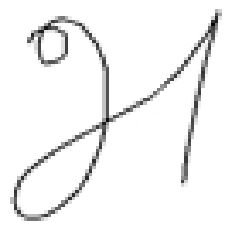

In [ ]:
img = plt.imread(train_dir + 'a/u16_000t04.jpeg')
print(img.shape)
plt.axis('off')
plt.imshow(img)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,  
    rescale=1/255,
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

In [ ]:
train = train_datagen.flow_from_directory(train_dir, target_size=(64,64))
validation = val_datagen.flow_from_directory(val_dir, target_size=(64,64))

Found 2420 images belonging to 11 classes.
Found 579 images belonging to 11 classes.


(64, 64, 3)


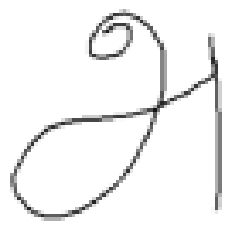

In [ ]:
img = plt.imread(train.directory + train.filenames[100])
print(img.shape)
plt.axis('off')
plt.imshow(img)

In [ ]:
ckp_filepath = 'trained-models/model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckp_filepath, 
                                                      monitor='val_mae', 
                                                      mode='auto',
                                                      save_best_only=True, 
                                                      save_weights_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, monitor='val_mae', 
                                                 mode='auto', cooldown=0, 
                                                 patience=3, verbose=1, min_lr=1e-5)

In [ ]:
keras.backend.clear_session()
model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu',input_shape=(64,64,3)),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(512, activation='relu'),
  # Dense(128, activation='relu'),
  # Dense(64, activation='relu'),
  Dense(NUM_CLASSES, activation='softmax')
])

# visualkeras.layered_view(model, max_xy=700)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc','mae'])

In [ ]:
history = model.fit(train, epochs=30, validation_data=validation, callbacks=[model_checkpoint, reduce_lr])

Epoch 1/30
76/76 [==============================] - 5s 56ms/step - loss: 2.4025 - acc: 0.0686 - mae: 0.1653 - val_loss: 2.3978 - val_acc: 0.0950 - val_mae: 0.1653
Epoch 2/30
76/76 [==============================] - 4s 50ms/step - loss: 2.3982 - acc: 0.0811 - mae: 0.1653 - val_loss: 2.3968 - val_acc: 0.0950 - val_mae: 0.1653
Epoch 3/30
76/76 [==============================] - 4s 50ms/step - loss: 2.3559 - acc: 0.1182 - mae: 0.1637 - val_loss: 1.6769 - val_acc: 0.3437 - val_mae: 0.1290
Epoch 4/30
76/76 [==============================] - 4s 50ms/step - loss: 1.6964 - acc: 0.3733 - mae: 0.1325 - val_loss: 1.1176 - val_acc: 0.5959 - val_mae: 0.0884
Epoch 5/30
76/76 [==============================] - 4s 50ms/step - loss: 1.2565 - acc: 0.5566 - mae: 0.1057 - val_loss: 0.7290 - val_acc: 0.7461 - val_mae: 0.0610
Epoch 6/30
76/76 [==============================] - 4s 50ms/step - loss: 0.9203 - acc: 0.6753 - mae: 0.0816 - val_loss: 0.4944 - val_acc: 0.8066 - val_mae: 0.0468
Epoch 7/30
76/76 [====

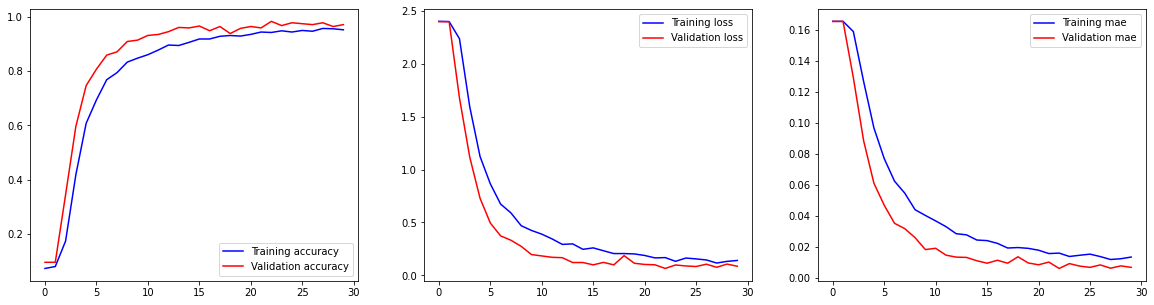

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(len(acc))

fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

axes[0].plot(epochs, acc, 'b', label='Training accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
axes[0].legend(loc=0)

axes[1].plot(epochs, loss, 'b', label='Training loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation loss')
axes[1].legend(loc=0)

axes[2].plot(epochs, mae, 'b', label='Training mae')
axes[2].plot(epochs, val_mae, 'r', label='Validation mae')
axes[2].legend(loc=0)

plt.show()

# Prediction

In [ ]:
prediction = model.predict_generator(train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


ea


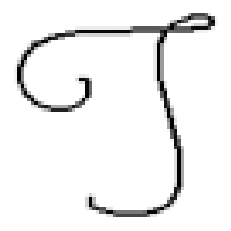

In [ ]:
index = 245
img = plt.imread(validation.directory + validation.filenames[index])
plt.axis('off')
plt.imshow(img)
print(letters[prediction[index].argmax()])

In [ ]:
model.evaluate(validation)

19/19 [==============================] - 0s 11ms/step - loss: 0.0862 - acc: 0.9706 - mae: 0.0068


[0.08624305576086044, 0.9706390500068665, 0.006792436353862286]

In [ ]:
model.save('tamil_char_model')

INFO:tensorflow:Assets written to: tamil_char_model/assets


# TFlite model

In [ ]:
TAMIL_RECOG_MODEL = "saved_models/tamil_recog"
tf.saved_model.save(model, TAMIL_RECOG_MODEL)

INFO:tensorflow:Assets written to: saved_models/tamil_recog/assets


In [ ]:
import tensorflow_hub as hub
tamil_model = hub.load(TAMIL_RECOG_MODEL)
print(flowers_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f0863ab31d0>


In [ ]:
import numpy as np
val_image_batch, val_label_batch = next(iter(validation))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 64, 64, 3)


In [ ]:
tf_model_predictions = tamil_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 11)


In [ ]:
!mkdir "tflite_models"

In [ ]:
TFLITE_MODEL = "tflite_models/tamil_recog.tflite"
TFLITE_QUANT_MODEL = "tflite_models/tamil_recog_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : flowers_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 876K
-rw-r--r-- 1 root root 188K Mar 30 06:38 tamil_recog_quant.tflite
-rw-r--r-- 1 root root 686K Mar 30 06:38 tamil_recog.tflite
